In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\USER\\Desktop\\filtara\\Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

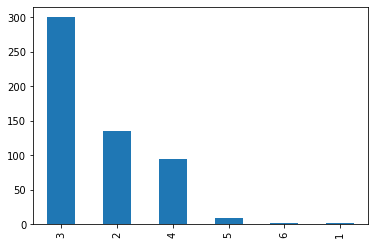

In [5]:
df['bedrooms'].value_counts().plot(kind='bar')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

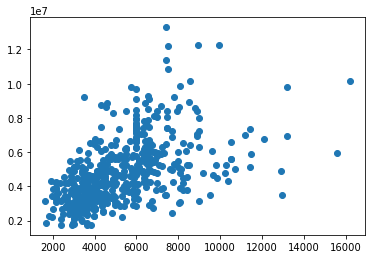

In [6]:
plt.scatter(df.area,df.price)
sns.despine

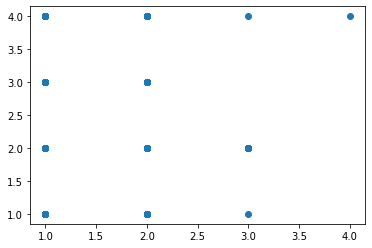

In [9]:
plt.scatter(df.bathrooms,df.stories)
plt.show()

In [28]:
df.drop(['guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],axis=1,inplace=True)

In [29]:
train=df.drop(['price','stories'],axis=1)
train.head()

,area,bedrooms,bathrooms,parking
0,7420,4,2,2
1,8960,4,4,3
2,9960,3,2,2
3,7500,4,2,3
4,7420,4,1,2


In [30]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
labels=df['price']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(train,labels,test_size=0.1,random_state=2)

In [33]:
reg.fit(x_train,y_train)

LinearRegression()

In [34]:
reg.score(x_test,y_test)

0.5802738849607547

In [42]:
from sklearn import ensemble
gbr=ensemble.GradientBoostingRegressor(n_estimators=200,max_depth=10,min_samples_split=2,learning_rate=0.1)

In [43]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=200)

In [45]:
gbr.score(x_test,y_test)

0.35983886048301905

In [48]:
y_pred=gbr.predict(x_test[0:2])
y_pred

array([3898167.4331265 , 4549455.58857095])